In [2]:
import folium as folium
import numpy as np
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from shapely.geometry import Point
import warnings
import folium
from folium.plugins import HeatMap
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

warnings.filterwarnings('ignore')

In [3]:
airbnb = pd.read_csv("Airbnb_NYC_2023_11.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.29,3,365,0,NaN
1,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,66,30,50,2019-12-02,0.28,2,120,0,NaN
2,9357,Rental unit in New York · ★4.52 · Studio · 1 b...,30193,Tommi,Manhattan,Hell's Kitchen,40.76724,-73.98664,Entire home/apt,175,45,58,2017-08-13,0.34,1,340,0,NaN
3,6848,Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81,30,191,2023-08-14,1.09,1,110,5,NaN
4,10452,Rental unit in Brooklyn · ★4.65 · 1 bedroom · ...,35935,Angela,Brooklyn,Bedford-Stuyvesant,40.68294,-73.95682,Private room,90,30,80,2023-09-16,0.49,4,290,2,NaN


In [4]:
len(airbnb)

39160

In [5]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### 1 - Understand and clean data

In [6]:
airbnb.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10949
reviews_per_month                 10949
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           35281
dtype: int64

In [7]:
airbnb.drop(['id', 'name', 'host_name', 'last_review', 'license'], axis=1, inplace=True)
airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,0.29,3,365,0
1,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,66,30,50,0.28,2,120,0
2,30193,Manhattan,Hell's Kitchen,40.76724,-73.98664,Entire home/apt,175,45,58,0.34,1,340,0
3,15991,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81,30,191,1.09,1,110,5
4,35935,Brooklyn,Bedford-Stuyvesant,40.68294,-73.95682,Private room,90,30,80,0.49,4,290,2


In [8]:
airbnb.fillna({'reviews_per_month': 0}, inplace=True)

airbnb.reviews_per_month.isnull().sum()

0

In [9]:
airbnb.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [10]:
len(airbnb.neighbourhood.unique())

223

In [11]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.916000e+04,39160.000000,39160.000000,39160.000000,39160.000000,39160.000000,39160.000000,39160.000000,39160.000000,39160.000000
mean,1.575643e+08,40.729372,-73.945897,205.995480,30.272165,25.584397,0.770732,39.493105,153.915628,6.735674
std,1.693066e+08,0.056645,0.054958,466.662167,26.534306,57.488642,1.545545,117.040976,144.305706,17.023977
min,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.654341e+07,40.688880,-73.982819,76.000000,30.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,7.831966e+07,40.726470,-73.953960,130.000000,30.000000,4.000000,0.160000,1.000000,130.000000,0.000000
75%,2.783108e+08,40.762632,-73.926260,220.000000,30.000000,23.000000,0.930000,6.000000,309.000000,5.000000
max,5.442621e+08,40.911380,-73.713650,30000.000000,1250.000000,1854.000000,73.720000,647.000000,365.000000,900.000000


## add zipcode

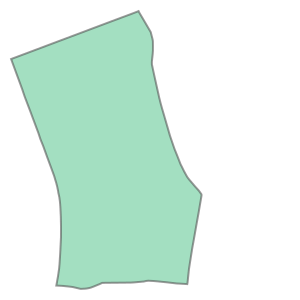

In [12]:
zipcode = gpd.read_file('./ZIPCODE/ZIP_CODE_040114.shp')
zipcode['geometry'][0]

In [13]:
airbnb_gdf = gpd.GeoDataFrame(
    airbnb,
    geometry=gpd.points_from_xy(airbnb.longitude, airbnb.latitude),
    crs="EPSG:4326"
)

In [14]:
airbnb_gdf = airbnb_gdf.to_crs(zipcode.crs)

In [15]:
joined_gdf = gpd.sjoin(airbnb_gdf, zipcode, how="left", op="within")
joined_gdf['ZIPCODE']

0        10018
1        11216
2        10019
3        11211
4        11238
         ...  
39155    10001
39156    11221
39157    10016
39158    10016
39159    10016
Name: ZIPCODE, Length: 39250, dtype: object

In [16]:
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb_with_zip = airbnb.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')
len(airbnb_with_zip)

39160

In [17]:
airbnb_with_zip

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,ZIPCODE
0,2845,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,240,30,49,0.29,3,365,0,10018
1,7356,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,66,30,50,0.28,2,120,0,11216
2,30193,Manhattan,Hell's Kitchen,40.767240,-73.986640,Entire home/apt,175,45,58,0.34,1,340,0,10019
3,15991,Brooklyn,Williamsburg,40.709350,-73.953420,Entire home/apt,81,30,191,1.09,1,110,5,11211
4,35935,Brooklyn,Bedford-Stuyvesant,40.682940,-73.956820,Private room,90,30,80,0.49,4,290,2,11238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39155,401202937,Manhattan,Midtown,40.747829,-73.986907,Private room,64,1,0,0.00,56,62,0,10001
39156,441448134,Brooklyn,Bedford-Stuyvesant,40.689207,-73.936728,Entire home/apt,119,30,0,0.00,1,258,0,11221
39157,107434423,Manhattan,Kips Bay,40.744972,-73.977042,Entire home/apt,266,31,0,0.00,647,333,0,10016
39158,107434423,Manhattan,Kips Bay,40.740508,-73.978347,Entire home/apt,322,31,0,0.00,647,365,0,10016


### 2 - Exploring and Visualizing Data

In [18]:
top_host = airbnb.host_id.value_counts().head(10)
top_host

host_id
107434423    647
3223938      542
305240193    372
496944100    304
19303369     262
200239515    242
204704622    228
162280872    227
501999278    183
501499086    149
Name: count, dtype: int64

In [19]:
top_host_check = airbnb.calculated_host_listings_count.max()
top_host_check

647

Text(0.5, 1.0, 'Top 5 Hosts With Most Posts')

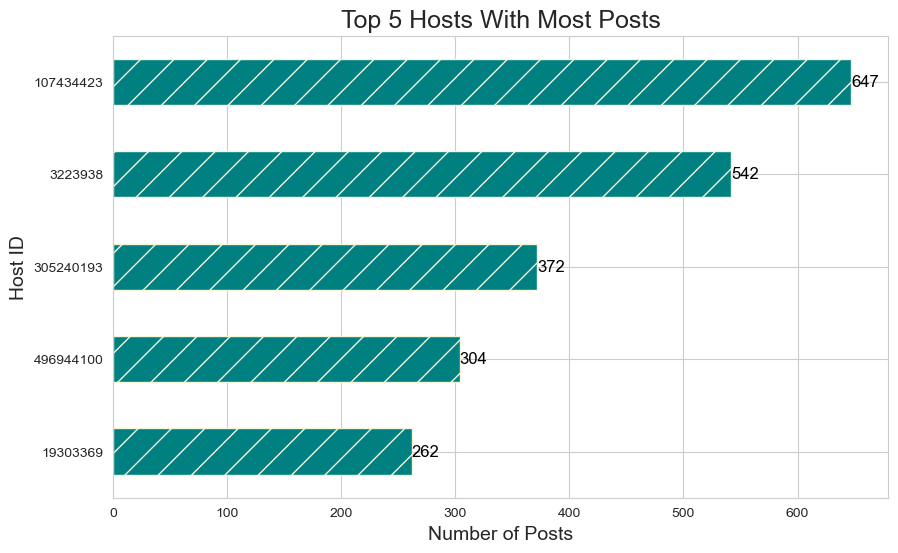

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = plt.axes()
airbnb["host_id"].value_counts().head().sort_values().plot(kind="barh",
                                                           color="teal",
                                                           hatch="/",
                                                           edgecolor="beige")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=12)
plt.xlabel("Number of Posts", size=14)
plt.ylabel("Host ID", size=14)
plt.title("Top 5 Hosts With Most Posts", size=18)

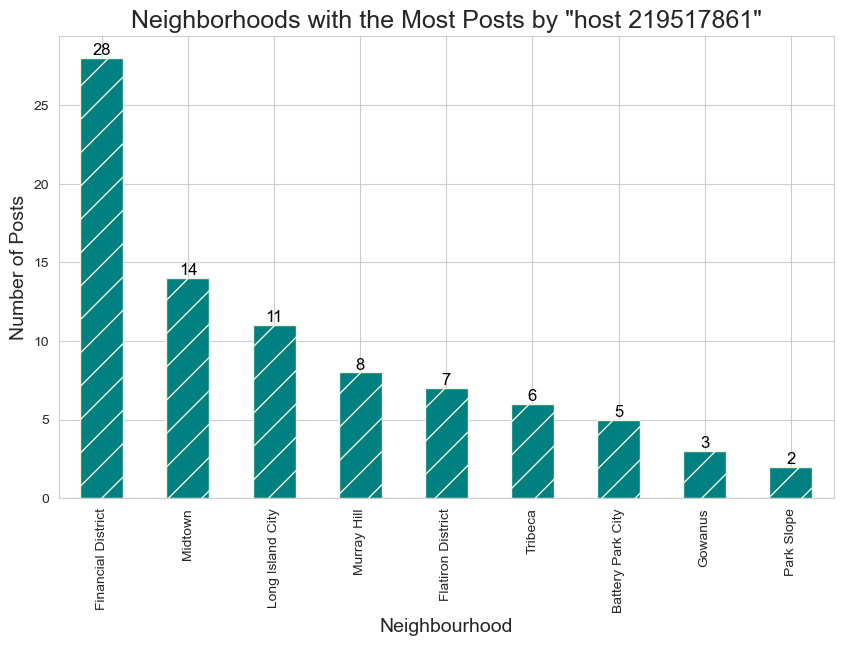

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = plt.axes()
airbnb.loc[airbnb['host_id'] == 219517861]["neighbourhood"].value_counts().plot(kind="bar", color="teal", hatch="/",
                                                                                edgecolor="beige")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=12)
plt.xlabel("Neighbourhood", size=14)
plt.ylabel("Number of Posts", size=14)
plt.title('Neighborhoods with the Most Posts by "host 219517861"', size=18)
plt.show()

Text(0.5, 1.0, 'Neighbourhood Groups')

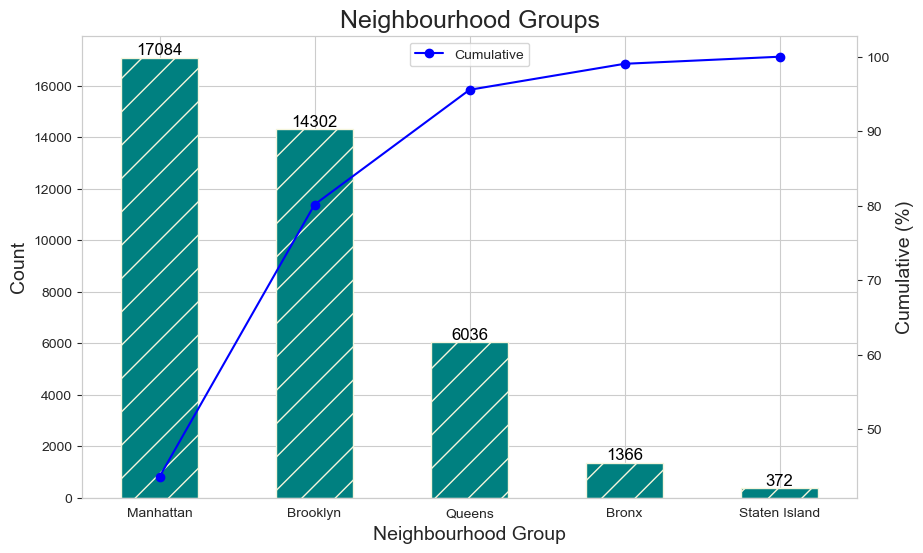

In [22]:
cumulative = round(airbnb["neighbourhood_group"].value_counts(normalize=True).cumsum() * 100, 2)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax1 = airbnb["neighbourhood_group"].value_counts().sort_values(ascending=False).plot(kind="bar", color="teal",
                                                                                     hatch="/", edgecolor="beige")

ax1.bar_label(ax1.containers[0], fmt='%.0f', color="black", fontsize=12)

ax2 = cumulative.plot(kind="line", color="blue", secondary_y=True, marker="o")
ax1.set_xlabel("Neighbourhood Group", size=14)
ax1.set_ylabel("Count", size=14)
ax2.set_ylabel("Cumulative (%)", size=14)
ax2.legend(["Cumulative"], loc=9)
plt.title("Neighbourhood Groups", size=18)

In [23]:
airbnb = airbnb.loc[airbnb['price'] > 0]
airbnb['price'].min()

10

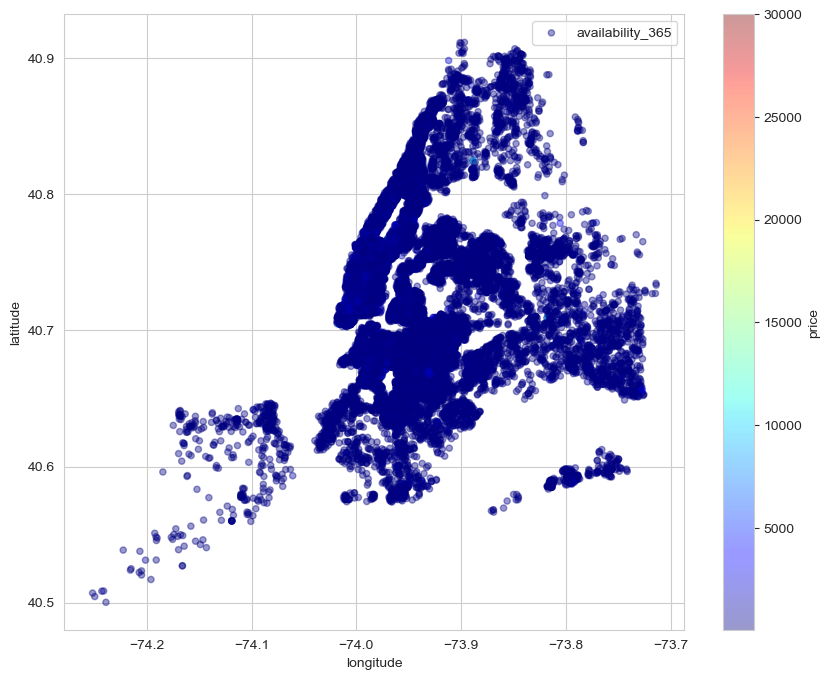

In [24]:
airbnb_geo = airbnb.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                         cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10, 8))
airbnb_geo.legend()

In [25]:
#Brooklyn
sub_1 = airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1 = sub_1[['price']]
#Manhattan
sub_2 = airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2 = sub_2[['price']]
#Queens
sub_3 = airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3 = sub_3[['price']]
#Staten Island
sub_4 = airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4 = sub_4[['price']]
#Bronx
sub_5 = airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5 = sub_5[['price']]

price_list_by_n = [price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [26]:
data1 = []

city_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

for x in price_list_by_n:
    i = x.describe(percentiles=[.25, .50, .75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index': 'Stats'}, inplace=True)
    data1.append(i)

data1[0].rename(columns={'price': city_list[0]}, inplace=True)
data1[1].rename(columns={'price': city_list[1]}, inplace=True)
data1[2].rename(columns={'price': city_list[2]}, inplace=True)
data1[3].rename(columns={'price': city_list[3]}, inplace=True)
data1[4].rename(columns={'price': city_list[4]}, inplace=True)

stat_df = data1
stat_df = [df.set_index('Stats') for df in stat_df]
stat_df = stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,10.0,10.0,10.0,33.0,10.0
25%,65.0,108.0,55.0,70.0,60.0
50%,110.0,175.0,90.0,99.0,90.0
75%,185.0,290.0,147.0,142.0,141.0
max,7500.0,30000.0,10000.0,1200.0,9994.0


In [27]:
sub_6 = airbnb[airbnb.price < 500]

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

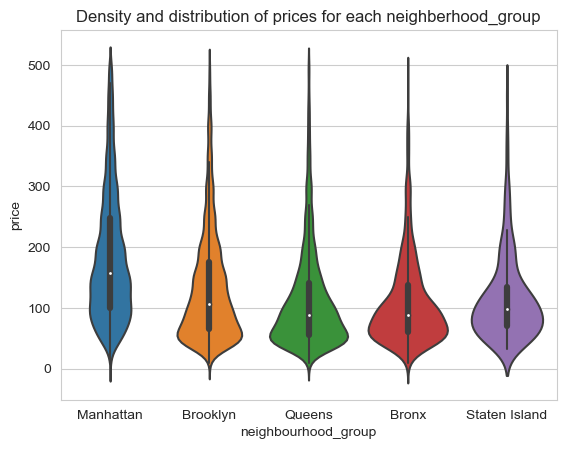

In [28]:
data2 = sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
data2.set_title('Density and distribution of prices for each neighberhood_group')

In [29]:
airbnb.neighbourhood.value_counts().head(10)

neighbourhood
Bedford-Stuyvesant    2723
Williamsburg          2296
Midtown               2076
Harlem                1841
Bushwick              1641
Hell's Kitchen        1599
Upper East Side       1533
Upper West Side       1517
Crown Heights         1235
East Village          1070
Name: count, dtype: int64

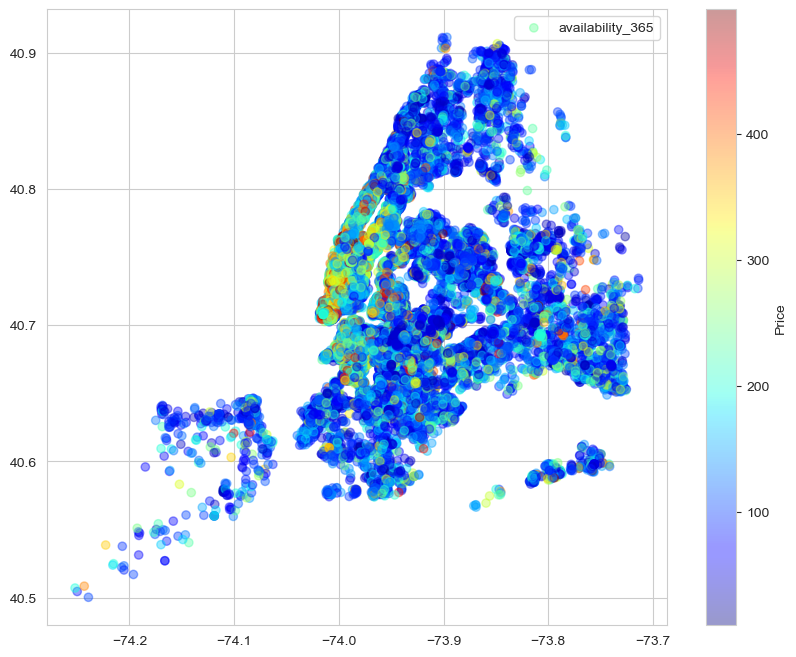

In [30]:
gdf = gpd.GeoDataFrame(sub_6, geometry=gpd.points_from_xy(sub_6.longitude, sub_6.latitude))

fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf['price'], cmap='jet', alpha=0.4)

plt.colorbar(scatter, ax=ax, label='Price')

ax.legend(['availability_365'])
plt.show()

In [31]:
m = folium.Map([40.7128, -74.0060], zoom_start=11)
HeatMap(airbnb[['latitude', 'longitude']].dropna(), radius=8,
        gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1.0: 'red'}).add_to(m)
display(m)

Text(0.5, 1.0, 'Price Distribution After Log Transformation')

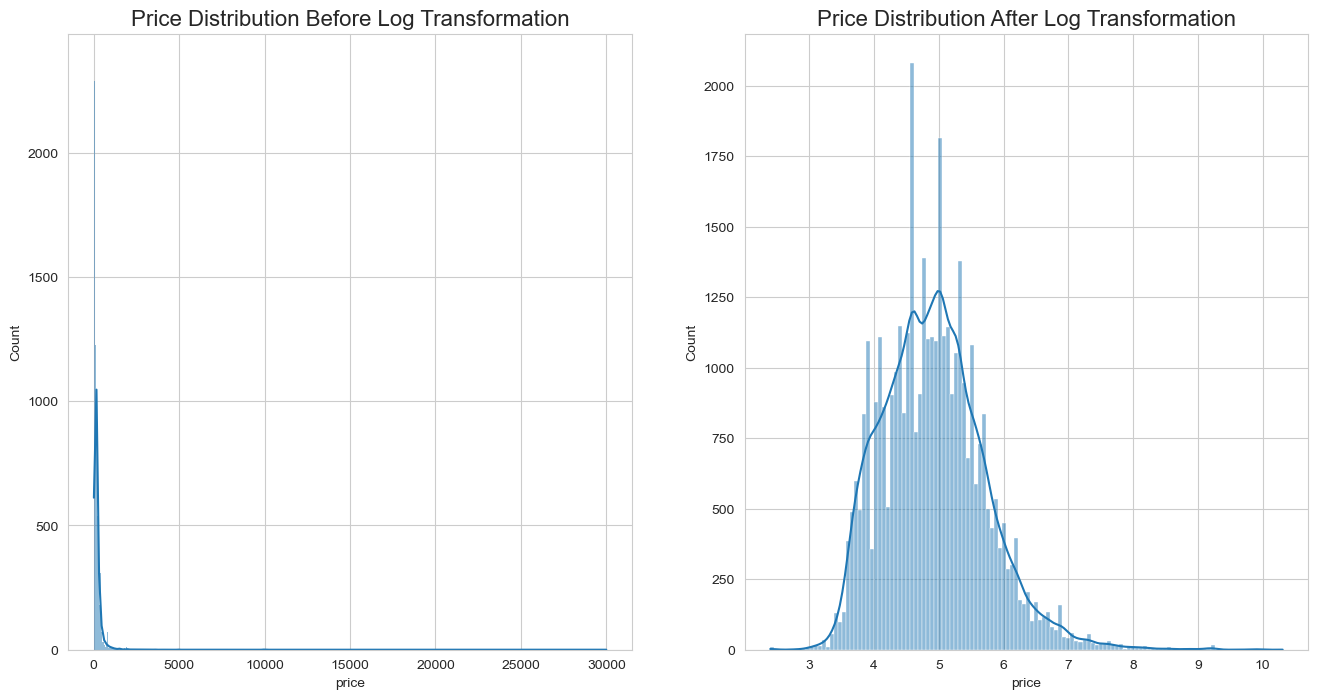

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.histplot(data=airbnb, x="price", kde=True, ax=ax[0]).set_title("Price Distribution Before Log Transformation",
                                                                   size=16)
sns.histplot(np.log1p(airbnb.price), kde=True, ax=ax[1]).set_title("Price Distribution After Log Transformation",
                                                                   size=16)

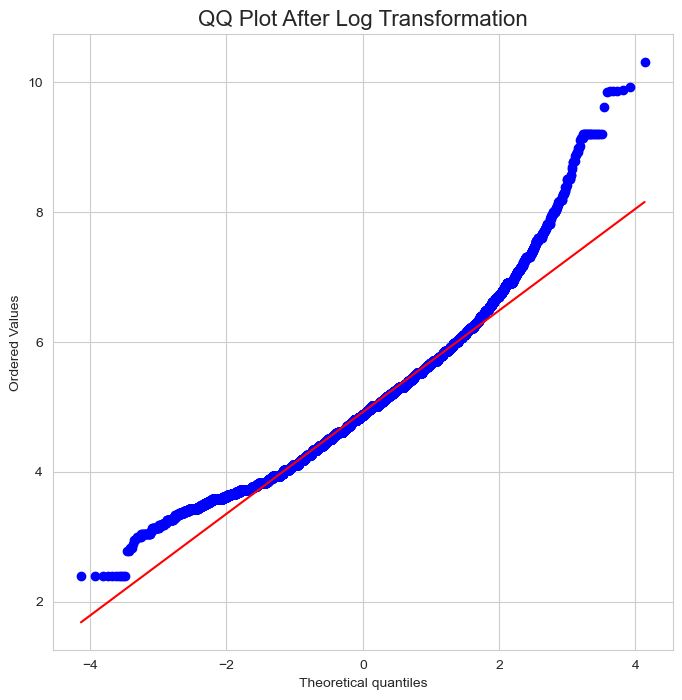

In [33]:
price_after_transform = np.log1p(airbnb["price"])

plt.figure(figsize=(8, 8))
stats.probplot(price_after_transform, plot=plt)
plt.title("QQ Plot After Log Transformation", size=16)

plt.show()

In [34]:
geojs = gpd.read_file('neighborhood.geojson')

In [35]:
df = airbnb[['latitude', 'longitude', 'price']]

In [36]:
df['coords'] = list(zip(df.longitude, df.latitude))
df['coords'] = df['coords'].apply(Point)

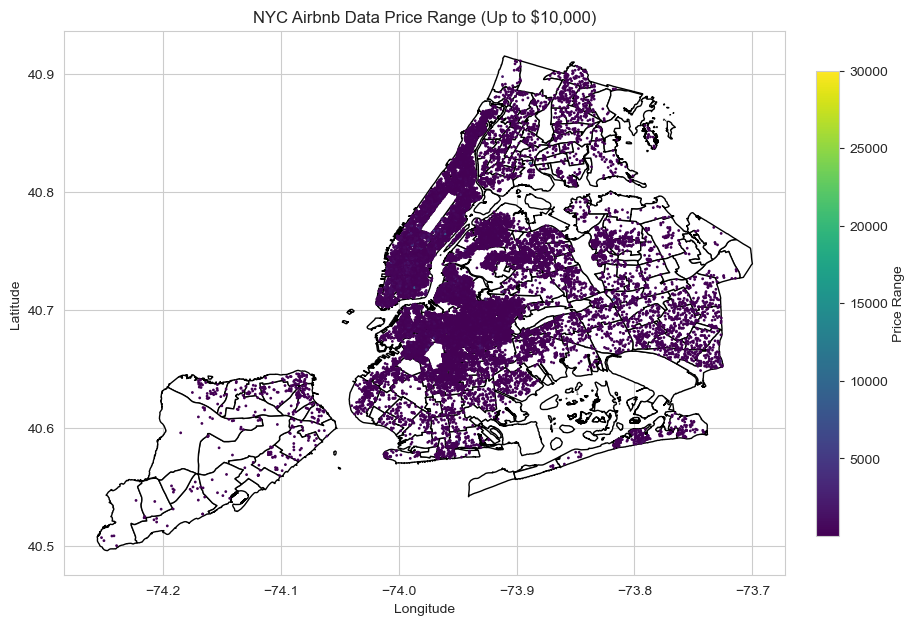

In [37]:
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.cm import ScalarMappable, viridis

gdf = gpd.GeoDataFrame(df, geometry='coords')

base = geojs.plot(color='white', edgecolor='black', linewidth=1, figsize=(10, 10))

norm = Normalize(vmin=gdf['price'].min(), vmax=gdf['price'].max())

price_plot = gdf.plot(ax=base, marker='o', column='price', markersize=1, cmap='viridis', legend=False, norm=norm)

sm = ScalarMappable(norm=norm, cmap='viridis')
sm._A = []
cbar = plt.colorbar(sm, ax=base, fraction=0.03, pad=0.04)
cbar.set_label('Price Range')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Airbnb Data Price Range (Up to $10,000)')

plt.savefig('Price_map.svg', bbox_inches='tight')

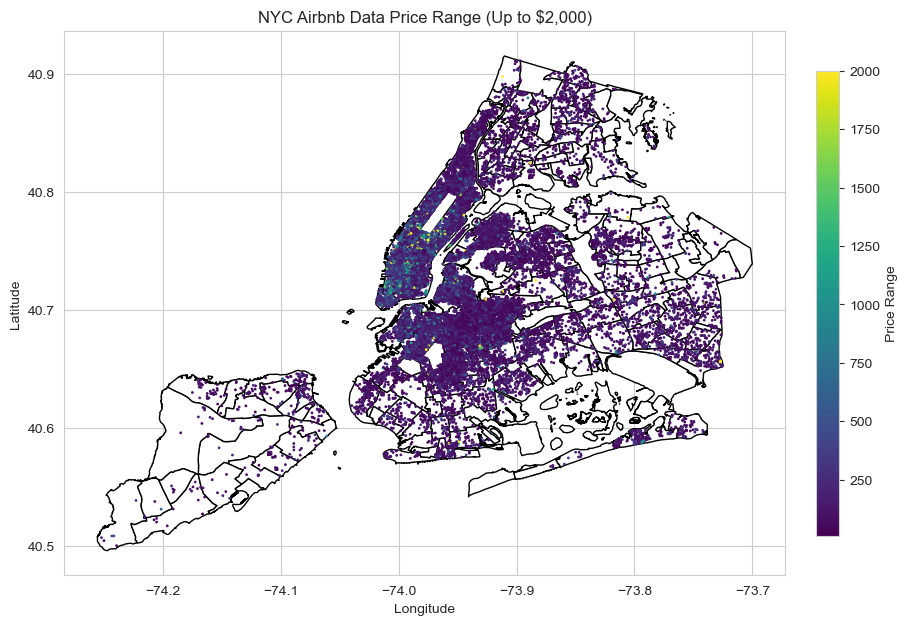

In [38]:
gdf = gpd.GeoDataFrame(df, geometry='coords')

base = geojs.plot(color='white', edgecolor='black', linewidth=1, figsize=(10, 10))

norm = Normalize(vmin=gdf['price'].min(), vmax=2000)

price_plot = gdf.plot(ax=base, marker='o', column='price', markersize=1, cmap='viridis', legend=False, norm=norm)

sm = ScalarMappable(norm=norm, cmap='viridis')
sm._A = []
cbar = plt.colorbar(sm, ax=base, fraction=0.03, pad=0.04)
cbar.set_label('Price Range')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Airbnb Data Price Range (Up to $2,000)')

plt.savefig('Price_map.svg', bbox_inches='tight')

In [61]:
Rental_Income = pd.read_csv("DOF_Condominium_Comparable_Rental_Income_in_NYC_20231211.csv")
Rental_Income

,Boro-Block-Lot,Condo Section,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,...,Gross SqFt 3,Estimated Gross Income 3,Gross Income per SqFt 3,Estimated Expense 3,Expense per SqFt 3,Net Operating Income 3,Full Market Value 3,Market Value per SqFt 3,Distance from Condo in miles 2,Report Year
0,1-00576-7501,0003-R1,60 WEST 13 STREET,GREENWICH VILLAGE-CENTRAL,R4 -ELEVATOR,70,1966.0,82017,4452703,54.29,...,27108.0,1471693.0,54.29,571708.0,21.09,899985.0,7318000.0,269.96,0.35,2019
1,1-01271-7501,0007-R2,1360 6 AVENUE,MIDTOWN WEST,R4 -ELEVATOR,183,1963.0,141738,7113830,50.19,...,39510.0,1987748.0,50.31,527854.0,13.36,1459894.0,9322000.0,235.94,0.63,2019
2,1-00894-7501,0009-R1,77 PARK AVENUE,MURRAY HILL,R4 -ELEVATOR,109,1924.0,158571,7329152,46.22,...,20784.0,960636.0,46.22,374112.0,18.00,586524.0,3423000.0,164.69,0.22,2019
3,1-00631-7501,0018-R1,712 GREENWICH STREET,GREENWICH VILLAGE-WEST,R9 -CONDOPS,20,1910.0,53943,2132906,39.54,...,37064.0,1461804.0,39.44,504070.0,13.60,957734.0,14265000.0,384.87,0.19,2019
4,1-00868-7501,0019-R1,35 EAST 38 STREET,MURRAY HILL,R4 -ELEVATOR,113,1961.0,88230,4288860,48.61,...,41603.0,2022322.0,48.61,497572.0,11.96,1524750.0,7628000.0,183.35,0.22,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31570,5-02829-7501,0100-R1,31 HYLAN BOULEVARD,ROSEBANK,R4 -ELEVATOR,52,1988.0,63601,1425934,22.42,...,297600.0,6743616.0,22.66,3217056.0,10.81,3526560.0,26655000.0,89.57,0.93,2023
31571,5-02862-7501,0086-R1,50 BELAIR ROAD,ROSEBANK,R2 -WALK-UP,48,1985.0,51425,1097410,21.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
31572,5-03019-7501,0117-R1,81 NARROWS ROAD NORTH,ROSEBANK,R2 -WALK-UP,40,1946.0,38700,846369,21.87,...,8950.0,210862.0,23.56,74106.0,8.28,136756.0,1110000.0,124.02,0.17,2023
31573,5-03318-7501,0097-R1,163 CROMWELL AVENUE,DONGAN HILLS,R2 -WALK-UP,48,1973.0,38424,745810,19.41,...,10626.0,206251.0,19.41,99884.0,9.40,106366.0,813000.0,76.51,0.21,2023


In [62]:
Rental_grossIncome = Rental_Income.groupby(['Neighborhood']).agg({'Gross Income per SqFt': 'mean'})

In [63]:
Rental_grossIncome.sort_index(inplace=True)

In [64]:
Rental_grossIncome

,Gross Income per SqFt
Neighborhood,
15TH Q QUEENS,29.626667
2999,12.600000
30TH Q BROOKLYN,20.820000
50TH Q BROOKLYN,24.882500
5TH Q BROOKLYN,26.815000
...,...
WINDSOR TERRACE,28.558235
WOODHAVEN,18.254524
WOODSIDE,28.398794


In [65]:
airbnb_neighbor_price = airbnb.groupby(['neighbourhood']).agg({'price': 'mean'})

In [66]:
airbnb_neighbor_price

,price
neighbourhood,
Allerton,121.209302
Arden Heights,135.333333
Arrochar,147.500000
Arverne,208.831579
Astoria,113.670330
...,...
Windsor Terrace,176.063830
Woodhaven,88.531646
Woodlawn,99.700000


In [67]:
airbnb_neighbor_price.index = airbnb_neighbor_price.index.str.upper()

In [68]:
filtered_Rental_grossIncome = Rental_grossIncome[Rental_grossIncome.index.isin(airbnb_neighbor_price.index)]

In [69]:
filtered_Rental_grossIncome

,Gross Income per SqFt
Neighborhood,
ARVERNE,29.905000
ASTORIA,27.833360
BATH BEACH,17.751803
BAY RIDGE,20.267846
BAYSIDE,23.749327
...,...
WHITESTONE,20.868000
WILLIAMSBRIDGE,17.756970
WINDSOR TERRACE,21.261250


In [70]:
Rental_marketvalue = Rental_Income.groupby(['Neighborhood']).agg({'Market Value per SqFt': 'mean'})
filtered_Rental_marketvalue = Rental_marketvalue[Rental_marketvalue.index.isin(airbnb_neighbor_price.index)]

In [71]:
filtered_Rental_marketvalue

,Market Value per SqFt
Neighborhood,
ARVERNE,137.250000
ASTORIA,143.843281
BATH BEACH,73.815082
BAY RIDGE,90.857385
BAYSIDE,120.646635
...,...
WHITESTONE,90.485500
WILLIAMSBRIDGE,72.936970
WINDSOR TERRACE,101.908571


In [72]:
logairbnbPrice = np.log(airbnb_neighbor_price['price'])
logmarketvalue = np.log(filtered_Rental_marketvalue['Market Value per SqFt'])
dataLog = pd.DataFrame({'logairbnbPrice': logairbnbPrice, 'logmarketvalue': logmarketvalue})
dataLog.dropna()

,logairbnbPrice,logmarketvalue
ARVERNE,5.341528,4.921804
ASTORIA,4.733302,4.968724
BATH BEACH,5.100707,4.301563
BAY RIDGE,4.713814,4.509291
BAYSIDE,5.013900,4.792866
...,...,...
WHITESTONE,5.773969,4.505190
WILLIAMSBRIDGE,4.572991,4.289596
WINDSOR TERRACE,5.170847,4.624076
WOODHAVEN,4.483360,4.320914


In [73]:
lmairbnbPrice = smf.ols('logmarketvalue~logairbnbPrice', data=dataLog).fit()
print(lmairbnbPrice.summary())

                            OLS Regression Results                            
Dep. Variable:         logmarketvalue   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     31.56
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.85e-07
Time:                        19:51:11   Log-Likelihood:                -47.299
No. Observations:                  99   AIC:                             98.60
Df Residuals:                      97   BIC:                             103.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.2494      0.428      5.

ValueError: x and y must have same first dimension, but have shapes (223,) and (99,)

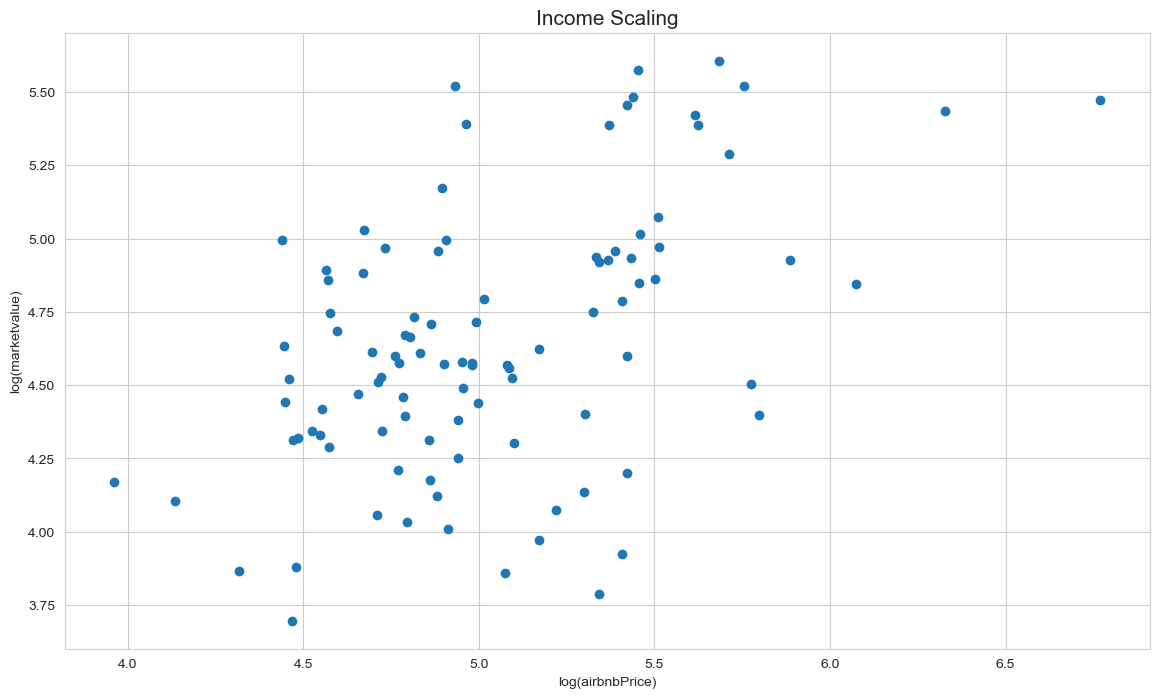

In [74]:
plt.figure(figsize=(14, 8))
plt.plot(dataLog['logairbnbPrice'], dataLog['logmarketvalue'], 'o', label='Data')
plt.title('Income Scaling', fontsize=15)
plt.xlabel('log(airbnbPrice)')
plt.ylabel('log(marketvalue)')
plt.plot(dataLog['logairbnbPrice'], lmairbnbPrice.predict(), '-r', label='Fitted Line')
plt.legend()

plt.show()

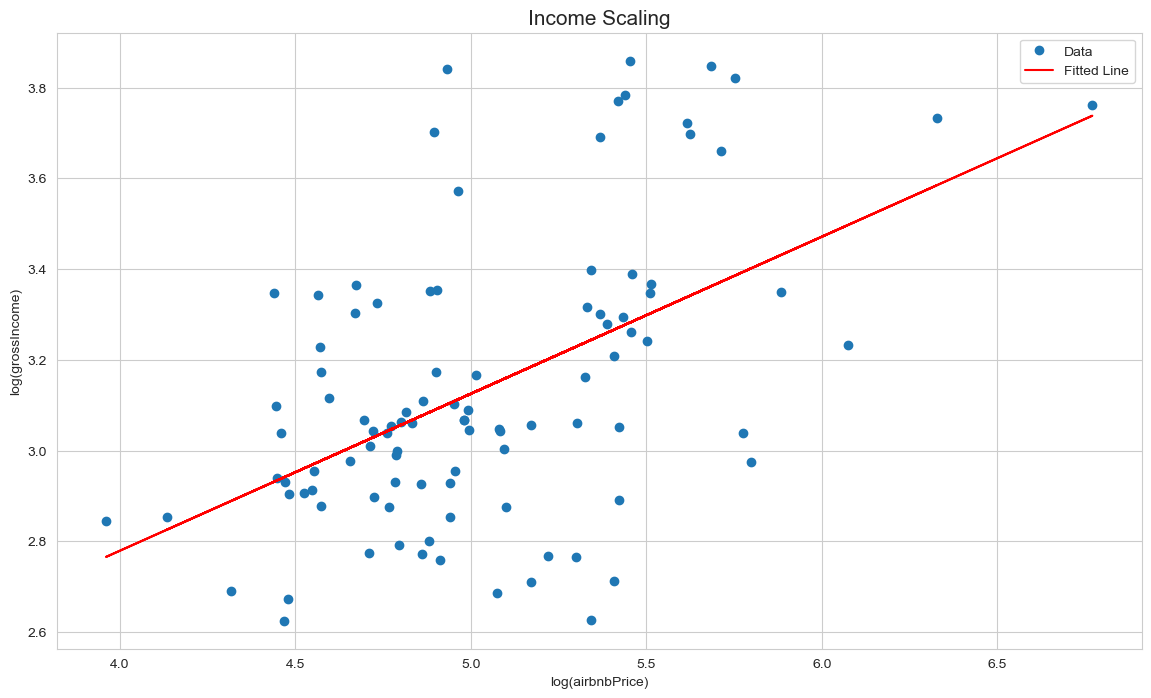

In [75]:
loggrossIncome = np.log(filtered_Rental_grossIncome['Gross Income per SqFt'])

# Create a new DataFrame
dataLog = pd.DataFrame({'logairbnbPrice': logairbnbPrice, 'loggrossIncome': loggrossIncome})

# Drop NaN values and reassign
dataLog = dataLog.dropna()

# Fit the model
lmairbnbPrice = smf.ols('loggrossIncome ~ logairbnbPrice', data=dataLog).fit()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(dataLog['logairbnbPrice'], dataLog['loggrossIncome'], 'o', label='Data')
plt.title('Income Scaling', fontsize=15)
plt.xlabel('log(airbnbPrice)')
plt.ylabel('log(grossIncome)')
plt.plot(dataLog['logairbnbPrice'], lmairbnbPrice.predict(), '-r', label='Fitted Line')
plt.legend()

plt.show()

### Correlation Matrix

In [76]:
airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,0.29,3,365,0
1,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,66,30,50,0.28,2,120,0
2,30193,Manhattan,Hell's Kitchen,40.76724,-73.98664,Entire home/apt,175,45,58,0.34,1,340,0
3,15991,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81,30,191,1.09,1,110,5
4,35935,Brooklyn,Bedford-Stuyvesant,40.68294,-73.95682,Private room,90,30,80,0.49,4,290,2


In [77]:
le = preprocessing.LabelEncoder()

le.fit(airbnb['neighbourhood_group'])
airbnb['neighbourhood_group'] = le.transform(airbnb['neighbourhood_group'])

le.fit(airbnb['neighbourhood'])
airbnb['neighbourhood'] = le.transform(airbnb['neighbourhood'])

le.fit(airbnb['room_type'])
airbnb['room_type'] = le.transform(airbnb['room_type'])

In [78]:
airbnb.sort_values('price', ascending=True, inplace=True)

In [79]:
airbnb["price"] = np.log1p(airbnb["price"])
X = airbnb.drop("price", axis=1)
y = airbnb["price"]
X.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
28096,306024152,3,183,40.67144,-73.79488,2,90,3,0.21,5,0,0
20775,24641078,2,203,40.77723,-73.96053,0,30,14,0.46,4,64,3
11821,67985770,2,203,40.78140,-73.95058,0,30,0,0.00,17,0,0
20606,33620899,3,222,40.74909,-73.89678,0,30,0,0.00,1,0,0
15136,1542506,2,96,40.81766,-73.94472,2,30,4,0.08,1,0,0


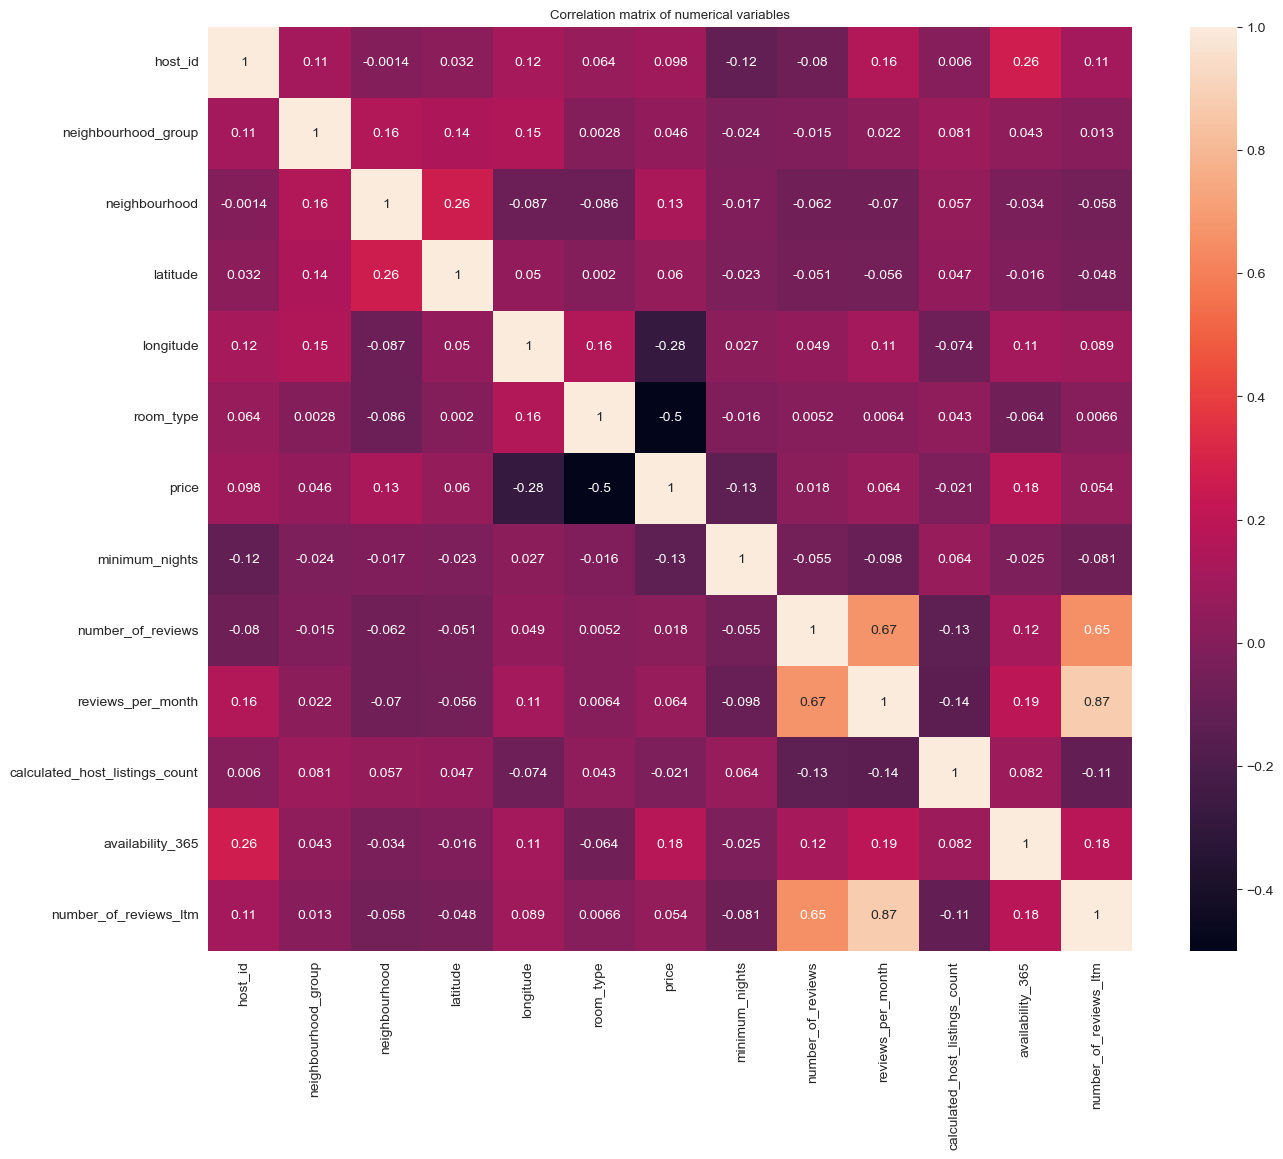

In [80]:
corrmatrix = airbnb.corr()
title = 'Correlation matrix of numerical variables'
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmatrix, square=True, annot=True)
sns.set(font_scale=0.8)
plt.title(title)
plt.show()

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train.iloc[:, 1:])

StandardScaler()

In [83]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train.iloc[:, 1:]),
                              columns=X_train.columns[1:],
                              index=X_train.index)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid.iloc[:, 1:]),
                              columns=X_valid.columns[1:],
                              index=X_valid.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test.iloc[:, 1:]),
                             columns=X_test.columns[1:],
                             index=X_test.index)

### Linear Regression

In [99]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [101]:
reg.coef_

array([ 0.04314847,  0.04652342,  0.04142936, -0.19413443, -0.35124665,
       -0.08960464, -0.0410174 ,  0.07610435, -0.02349796,  0.12945414,
       -0.00473935])

In [102]:
reg.intercept_

4.920723502503638

In [105]:
mean_absolute_error(y_train,reg.predict(X_train_scaled))

0.4681243778605955

In [106]:
mean_squared_error(y_train,reg.predict(X_train_scaled))**0.5

0.6376763777903371

### Decision Tree Regression

In [87]:
from sklearn.tree import DecisionTreeRegressor

# train Decision Tree regression model
decisiontree = DecisionTreeRegressor(max_depth=10, min_samples_split=5)
decisiontree.fit(X_train_scaled, y_train)

#evaluating train error
mean_absolute_error(y_train, decisiontree.predict(X_train_scaled))

0.3411414381087734

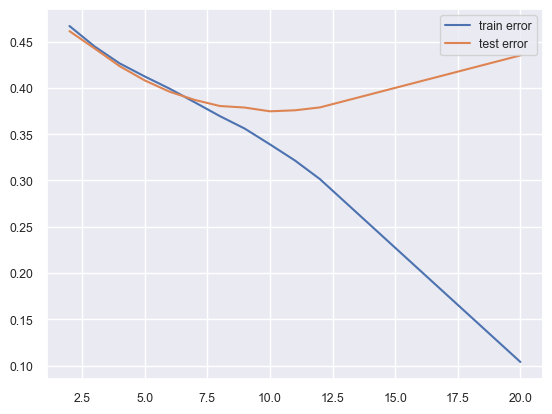

In [88]:
max_depth_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20]
train_error = []
test_error = []

for md in max_depth_list:
    decisiontree = DecisionTreeRegressor(max_depth=md, min_samples_split=2)
    decisiontree.fit(X_train_scaled, y_train)
    train_error.append(mean_absolute_error(y_train, decisiontree.predict(X_train_scaled)))
    test_error.append(mean_absolute_error(y_test, decisiontree.predict(X_test_scaled)))

plt.plot(max_depth_list, train_error, label='train error')
plt.plot(max_depth_list, test_error, label='test error')
plt.legend()

### Random Forest Regression

In [89]:
from sklearn.ensemble import RandomForestRegressor

# Fitting a Random Forest Regressor
randomf = RandomForestRegressor()
randomf.fit(X_train_scaled, y_train)
mean_absolute_error(y_train, randomf.predict(X_train_scaled))

0.1282631974041934

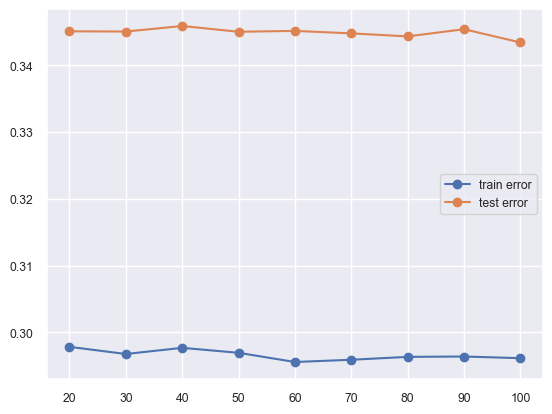

In [90]:
max_depth_list = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
train_error = []
test_error = []
N_estimator = [20, 30, 40, 50, 60, 70, 80, 90, 100]
for n in N_estimator:
    decisiontree = RandomForestRegressor(n_estimators=n, max_depth=12, min_samples_split=2)
    decisiontree.fit(X_train_scaled, y_train)
    train_error.append(mean_absolute_error(y_train, decisiontree.predict(X_train_scaled)))
    test_error.append(mean_absolute_error(y_test, decisiontree.predict(X_test_scaled)))

plt.plot(N_estimator, train_error, marker='o', label='train error')
plt.plot(N_estimator, test_error, marker='o', label='test error')
plt.legend()

In [91]:
pd.DataFrame({'feature': X_train_scaled.columns, "importance": randomf.feature_importances_ * 100}).sort_values(
    by='importance', ascending=False)

,feature,importance
4,room_type,25.731246
3,longitude,16.602035
2,latitude,13.582617
5,minimum_nights,13.032716
9,availability_365,8.033710
8,calculated_host_listings_count,7.550700
7,reviews_per_month,5.557593
6,number_of_reviews,3.905456
1,neighbourhood,3.368447
10,number_of_reviews_ltm,2.280770


### Lasso Regression

In [92]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_alpha(model, X_train, y_train, X_valid, y_valid, alphas, Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #alphas: a list of alpha values to try
    #Graph: plot the graph of R^2 values for different alpha

    R_2_OS = []  #out of sample R2's
    #initialize the model to use for each given alpha
    if model == 1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label = 'Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label = 'Lasso'

    best_R2 = -1
    best_alpha = alphas[0]
    best_coefs = []

    for a in alphas:  #for all alphas to try
        lm = RM(a)  #assign the model
        lm.fit(X_train, y_train)  #fit the regularization model
        y_predict = lm.predict(X_valid)  #compute the prediction for the validation sample
        R_2_OS_ = r2_score(y_valid, y_predict)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:  #if current OS R2 is the best - update the best solution
            best_R2 = R_2_OS_
            best_alpha = a
            best_coefs = lm.coef_

    if Graph == True:  #visualization of the performance depending on alpha
        plt.title('OS-R-squared for different Alpha')
        if logl:  #log-scale
            plt.xlabel('ln(Alpha)')
            l = np.log(alphas)
            bl = np.log(best_alpha)
        else:
            plt.xlabel('Alpha')
            l = alphas
            bl = best_alpha
        plt.ylim((-0.1, 1))
        plt.plot(l, R_2_OS, 'b', label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl, color='r', linestyle='--')

        plt.show()

    return [best_alpha, best_R2, best_coefs]

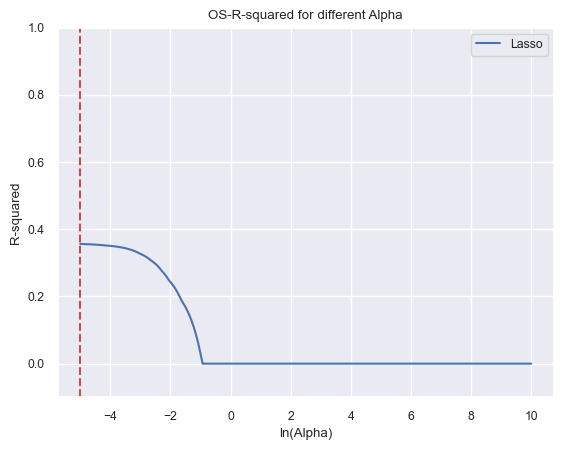

Optimal alpha for Lasso=0.006737946999085467, best OS R_2=0.3562960829330495


In [93]:
alphas_scaled = np.exp(np.linspace(-5, 10, 10000))  #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs] = Regularization_fit_alpha(2, X_train_scaled.iloc[:, 1:], y_train,
                                                                X_valid_scaled.iloc[:, 1:], y_valid,
                                                                alphas_scaled,
                                                                Graph=True, logl=True)
print('Optimal alpha for Lasso={0}, best OS R_2={1}'.format(alpha_optimal, best_R2))

In [94]:
Lasso = linear_model.Lasso(fit_intercept=True, alpha=alpha_optimal)

Lasso.fit(X_train_scaled.iloc[:, 1:], y_train)
# In sample:
YPred_IS_Lasso = Lasso.predict(X_train_scaled.iloc[:, 1:])
print("The IS R-squared of Lasso is: {0}".format(r2_score(y_train, YPred_IS_Lasso)))
#Out of sample
YPred_OS_Lasso = Lasso.predict(X_test_scaled.iloc[:, 1:])
print("The OS R-squared of Lasso is: {0}".format(r2_score(y_test, YPred_OS_Lasso)))
Lasso.coef_

The IS R-squared of Lasso is: 0.34751293524508
The OS R-squared of Lasso is: 0.3664536243896698


array([ 0.04775716,  0.03905506, -0.178956  , -0.34742655, -0.08574584,
       -0.02228774,  0.05503434, -0.01187077,  0.12331564,  0.        ])

0.463347261572879 0.626918600449211


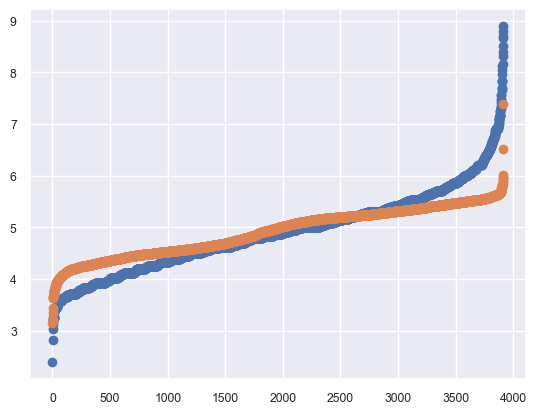

In [95]:
print(mean_absolute_error(y_test, YPred_OS_Lasso), mean_squared_error(y_test, YPred_OS_Lasso) ** 0.5)

plt.scatter(np.arange(len(np.sort(y_test))), np.sort(y_test))
plt.scatter(np.arange(len(np.sort(YPred_OS_Lasso))), np.sort(YPred_OS_Lasso))

### Ridge Regression

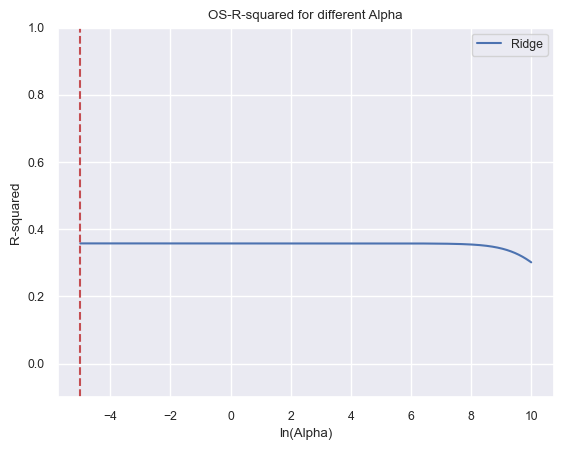

Optimal alpha for Ridge=0.006737946999085467, best OS R_2=0.3578863841420269


In [96]:
alphas_scaled = np.exp(np.linspace(-5, 10, 10000))  #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs] = Regularization_fit_alpha(1, X_train_scaled.iloc[:, 1:], y_train,
                                                                X_valid_scaled.iloc[:, 1:], y_valid,
                                                                alphas_scaled,
                                                                Graph=True, logl=True)
print('Optimal alpha for Ridge={0}, best OS R_2={1}'.format(alpha_optimal, best_R2))

In [97]:
Ridge = linear_model.Ridge(fit_intercept=True, alpha=alpha_optimal)

Ridge.fit(X_train_scaled.iloc[:, 1:], y_train)
# In sample:
YPred_IS_Ridge = Ridge.predict(X_train_scaled.iloc[:, 1:])
print("The IS R-squared of Lasso is: {0}".format(r2_score(y_train, YPred_IS_Ridge)))
#Out of sample
YPred_OS_Ridge = Ridge.predict(X_test_scaled.iloc[:, 1:])
print("The OS R-squared of Lasso is: {0}".format(r2_score(y_test, YPred_OS_Ridge)))
Ridge.coef_

The IS R-squared of Lasso is: 0.348429559772669
The OS R-squared of Lasso is: 0.3654213562744376


array([ 0.05238257,  0.04551362, -0.18744879, -0.35187179, -0.0907348 ,
       -0.04247073,  0.07880472, -0.01980528,  0.13017685, -0.00548218])

0.46283248426239826 0.6274291271557146


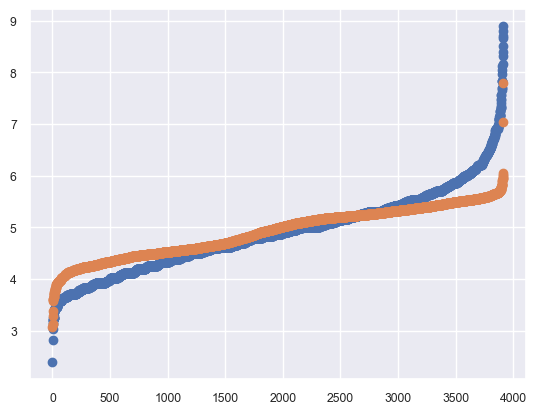

In [98]:
print(mean_absolute_error(y_test, YPred_OS_Ridge), mean_squared_error(y_test, YPred_OS_Ridge) ** 0.5)

plt.scatter(np.arange(len(np.sort(y_test))), np.sort(y_test))
plt.scatter(np.arange(len(np.sort(YPred_OS_Ridge))), np.sort(YPred_OS_Ridge))